### 데이터 불러오기

In [ ]:
import pandas as pd

train = pd.read_csv('../../../../data/Bike_Sharing_Demand/train.csv')
test = pd.read_csv('../../../../data/Bike_Sharing_Demand/test.csv')
sub = pd.read_csv('../../../../data/Bike_Sharing_Demand/sampleSubmission.csv')

train.shape, test.shape, sub.shape        

In [ ]:
# 결측치 확인
train.isna().sum(), test.isna().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 데이터 살펴보기
print(type(train), type(test))

In [ ]:
train.columns, test.columns

In [ ]:
train.info(), test.info()

In [ ]:
train.head()

In [ ]:
train.corr()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True)

In [ ]:
# 01 데이터 나누기
from sklearn.model_selection import train_test_split

sel = ['temp', 'atemp','season']
X = train[sel]
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# 02 모델 만들기
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

In [ ]:
# 5-1-3 모델 평가하기
(pred == y_test).sum()/(len(pred))

In [ ]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test

In [ ]:
good_k = 999  # 좋은 k 찾기
acc = 0       # 정확도
for i in range(1,500,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    if acc < np.mean(pred==y_test):
        good_k = i                  # k값 업데이트
        acc = np.mean(pred==y_test) # 정확도 업데이트
        print(i, np.mean(pred==y_test))

1 0.00440852314474651
2 0.006245407788390889
3 0.009184423218221896
4 0.011021307861866276
5 0.011388684790595151
6 0.012858192505510653
7 0.013592946362968405
41 0.013960323291697281
46 0.01579720793534166
49 0.016164584864070537
61 0.01653196179279941
66 0.01689933872152829
68 0.017266715650257163
73 0.018001469507714914
90 0.018368846436443792
108 0.018736223365172666
112 0.019103600293901544
129 0.019470977222630418
130 0.019838354151359296
133 0.02020573108008817
275 0.020573108008817047


In [141]:
# 3. RMSE (Root Mean Squared Error)
#  MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 쓴다.
#  에러에 제곱을 하기 때문에 에러가 크면 클수록 그에 따른 가중치가 높이 반영된다. 그러므로 예측 결과물의 에러가 10이 나온 것이 5로 나온 것보다, 정확히 2^2(4)배가 나쁜 도메인에서 쓰기 적합한 산식이다.
#  에러에 따른 손실이 기하 급수적으로 올라가는 상황에서 쓰기 적합하다.

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(pred, y_test) 
RMSE = np.sqrt(MSE)
RMSE

169.61099218534017

In [142]:
### 평가 - RMSE
### a = ((pred - 실제값) * (pred - 실제값) 이 값들의 합 )/ 데이터 수
### b = a ^ (1/2)

val1 = np.sum((pred-y_test) ** 2) / len(y_test)
val2 = np.sqrt(val1)
val2

169.61099218534017

In [154]:
test_rmse=[]

for num in range(1,100, 2):
    knn = KNeighborsRegressor(n_neighbors=num)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)

#     val1 = np.sum((pred-y_test) ** 2) / len(y_test)
#     val2 = np.sqrt(val1)
    MSE = mean_squared_error(pred, y_test) 
    RMSE = np.sqrt(MSE)
    RMSE
    
    test_rmse.append(RMSE)

In [155]:
k_num = list(range(1,100,2))
k_num

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [157]:
dat = pd.DataFrame({'k':k_num, 'rmse':test_rmse})
dat

,k,rmse
0,1,213.246912
1,3,177.875205
2,5,169.610992
3,7,165.934377
4,9,164.729064
5,11,163.169038
6,13,162.328638
7,15,162.183070
8,17,161.163703
9,19,160.940698


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

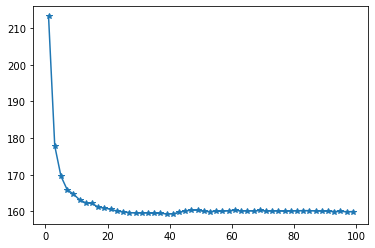

In [159]:
plt.plot(dat['k'], dat['rmse'], '*-') #rmse 값이 낮아야 좋다

In [148]:
### 마지막 최종 모델 만들기

test_X = test[sel]

In [149]:
knn = KNeighborsRegressor(n_neighbors=29)
knn.fit(X_train, y_train)
pred = knn.predict(test_X)
pred

array([144.51724138,  71.03448276,  71.03448276, ...,  93.79310345,
        71.03448276,  71.03448276])

In [150]:
sub.columns

Index(['datetime', 'count'], dtype='object')

In [151]:
sub['count'] = pred
sub.to_csv('0713_practice_bike.csv', index=False)

In [152]:
import os

In [153]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '0713_Class01_ML_Basic.ipynb',
 '0713_Class02.ipynb',
 '0713_practice_bike.csv',
 '0713_Practice_Bike_Sharing_Demand.ipynb',
 '0713_Review.ipynb',
 'cache']